<a href="https://colab.research.google.com/github/NoerNikmat/image_recognition_rockscissorhands/blob/main/predicting_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDIKSI GAMBAR SEDERHANA 
#MENGGUNAKAN CONVULUTIONAL NEURAL NETWORK

#### Dataset: Rock, Paper, Scissors Images
Link Dataset : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

## Import library

In [ ]:
import tensorflow as tf
import zipfile,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from google.colab import files
from keras.preprocessing import image

## Import Dataset & Ekstraksi File Zip

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-10-15 09:14:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.73MB/s    in 45s     

2020-10-15 09:15:18 (6.88 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp')

['__pycache__',
 'rockpaperscissors.zip',
 'tmpu922ffc0.py',
 'tmpppw8xewj.py',
 'rockpaperscissors',
 '__MACOSX',
 'tmpj5c72x_c.py']

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [ ]:
rps_image = '/tmp/rockpaperscissors/rps-cv-images'
rock_im = 'rock'
paper_im ='paper'
scissors_im = 'scissors'

rock_data = os.listdir(os.path.join(rps_image,rock_im))
paper_data = os.listdir(os.path.join(rps_image,paper_im))
scissors_data = os.listdir(os.path.join(rps_image,scissors_im))

print('Number of Rock images:', len(rock_data))
print('Number of Paper images:', len(paper_data))
print('Number of Scissors images:', len(scissors_data))

Number of Rock images: 726
Number of Paper images: 712
Number of Scissors images: 750


##Augmentasi Gambar dengan menggunakan Image Data Generator

In [ ]:
img_generator = ImageDataGenerator(validation_split=0.4, 
                                   rescale = 1./255)

train_generator = img_generator.flow_from_directory(rps_image,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = img_generator.flow_from_directory(rps_image,
                                                         target_size=(150,150),
                                                         batch_size=4,
                                                         class_mode='categorical',
                                                         subset='validation')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Untuk "Found 1314 images belonging to 3 classes" berarti ada 1314 gambar untuk data training. Sedang "Found 874 images belonging to 3 classes" itu bahwa terdapat 874 untuk data validasi-nya dengan 3 classes yang sama dengan data training yakni Rock, Papers, dan Scissors.

### Pemodelan dengan Model Sequential

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

## Training Model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model Fit untuk Data Training

In [ ]:
history = model.fit(
    train_generator, 
    validation_data  = validation_generator,
    epochs = 20,
    steps_per_epoch = 20,
    verbose=1)

Epoch 1/20
20/20 [==============================] - 20s 976ms/step - loss: 1.1428 - accuracy: 0.2625 - val_loss: 1.0981 - val_accuracy: 0.3249
Epoch 2/20
20/20 [==============================] - 20s 995ms/step - loss: 1.0996 - accuracy: 0.3125 - val_loss: 1.0956 - val_accuracy: 0.3249
Epoch 3/20
20/20 [==============================] - 19s 962ms/step - loss: 1.0966 - accuracy: 0.3500 - val_loss: 1.0400 - val_accuracy: 0.5904
Epoch 4/20
20/20 [==============================] - 19s 953ms/step - loss: 0.9468 - accuracy: 0.7000 - val_loss: 0.7450 - val_accuracy: 0.6705
Epoch 5/20
20/20 [==============================] - 19s 953ms/step - loss: 0.6146 - accuracy: 0.7250 - val_loss: 0.4545 - val_accuracy: 0.8455
Epoch 6/20
20/20 [==============================] - 19s 940ms/step - loss: 0.2149 - accuracy: 0.9103 - val_loss: 0.3396 - val_accuracy: 0.9027
Epoch 7/20
20/20 [==============================] - 19s 948ms/step - loss: 0.5907 - accuracy: 0.8000 - val_loss: 0.3552 - val_accuracy: 0.8719

Visualisasi Model Training

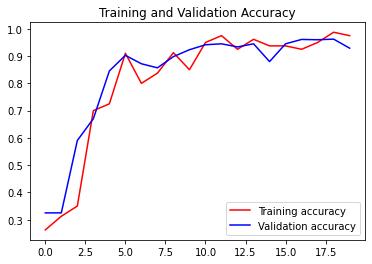

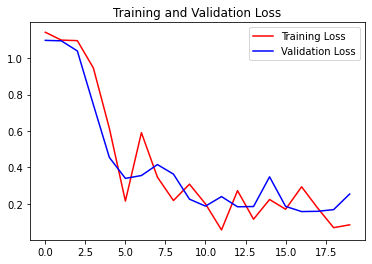

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Dari grafik dapat dilihat bahwa Training and Validation Accuracy, jarak data training dan validasinya dekat sehingga tidak terjadi overfitting. Begitupun dengan  Training and Validation Loss

## Output Prediksi Gambar

Saving 1 (3).png to 1 (3).png
1 (3).png
scissors


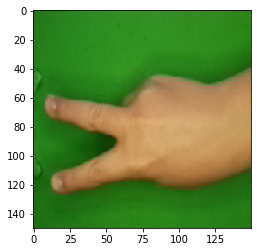

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

##Contributors

Noer Ni'mat Syamsul Kabir 